### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
from matplotlib import pyplot as plt
!pip install mlxtend==0.23.1

## Load Dataset

In [2]:
df = pd.read_excel('https://github.com/feliciastevany/DataMining-Datasets/raw/refs/heads/main/Supermarket-December-2017.xlsx')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


## Exploratory Data Analysis (EDA)

In [3]:
# information for each column including non-null count and the datatype
df.info()
# As shown, there are total 61 columns with different datatype and count of non-null value in each column.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [4]:
# check missing values
missing_values = df.isnull().sum()
missing_values
# from the output, we can see that there are many columns has missing values.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,3
TP_TRN,3
KDSUP,107657
KAS,12195
TRN_DK,3
...,...
TP_ADJ,9413
USER,3
TANGGAL,3
JAM,3


In [5]:
# Since there are manu columns with missing values, we need to check the percentage.
# To check the percentage of null values in each column, we must divided the null values by the total number of rows

# Percentage of null values for each column
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,0.002020
TP_TRN,0.002020
KDSUP,72.501667
KAS,8.212730
TRN_DK,0.002020
...,...
TP_ADJ,6.339190
USER,0.002020
TANGGAL,0.002020
JAM,0.002020


In [6]:
# Use only the necessary columns for apriori and association rules
new_column = ['ITEM', 'NO_BKT', 'KEL', 'QTY', 'JLH_TRANS', 'TANGGAL', 'JAM', 'USER']
df_new = df[new_column]
df_new.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ITEM,NO_BKT,KEL,QTY,JLH_TRANS,TANGGAL,JAM,USER
0,39390.0,060102001,KERTAS,2.0,2200.0,2017-01-02,08:12:02,MIA
1,13108.0,060102002,BTL/DOT,1.0,23000.0,2017-01-02,08:24:51,MIA
2,5644.0,060102003,MUSTIKA,1.0,9500.0,2017-01-02,08:28:18,MIA
3,7273.0,060102003,SABUN.C,1.0,6900.0,2017-01-02,08:28:22,MIA
4,12168.0,060102003,LULURMD,1.0,13500.0,2017-01-02,08:28:20,MIA


In [7]:
# check the missing values for new df
df_new.isnull().sum()
# there are still missing values in each column

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
ITEM,3
NO_BKT,3
KEL,3
QTY,3
JLH_TRANS,3
TANGGAL,3
JAM,3
USER,3


In [8]:
# Apply SimpleImputer to fill the null values with 'most_frequent' value
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df_new = pd.DataFrame(imputer.fit_transform(df_new), columns=df_new.columns)

df_new.isnull().sum() # make sure all the missing values in each column filled

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
ITEM,0
NO_BKT,0
KEL,0
QTY,0
JLH_TRANS,0
TANGGAL,0
JAM,0
USER,0


## Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


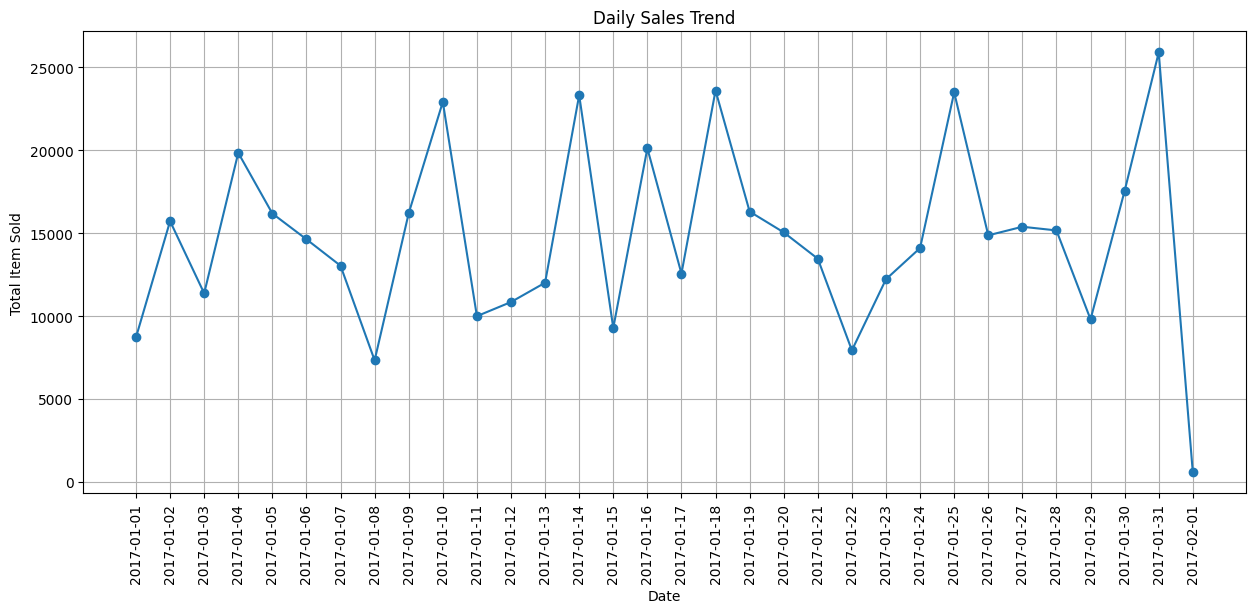

In [9]:
# Daily Sales Trends on January
# Convert date column to datetime
df_new['Date'] = pd.to_datetime(df_new['TANGGAL']).dt.date

# Aggregate daily sales
daily_sales = df_new.groupby('Date')['QTY'].sum().reset_index()

plt.figure(figsize=(15, 6))
plt.plot(daily_sales['Date'].astype(str), daily_sales['QTY'], marker='o')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Item Sold')
plt.xticks(rotation=90)
plt.grid()
plt.show()

# The output shows that the date with highest total item sold on January is 31 January 2017 and the lowest total item sold is on 8 January 2017.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


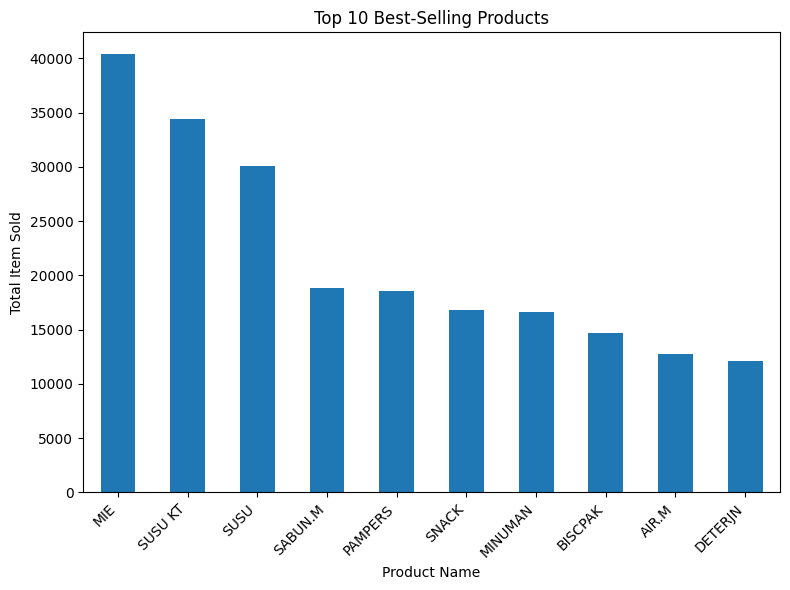

In [10]:
# Top 10 Best-Selling Products
# Group by product name and sum quantities
top_products = df_new.groupby('KEL')['QTY'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Item Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# The bar chart shows top 10 of the best selling products based on the datasets. The most best selling product is MIE with 40000 items sold.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-14-2b307010ba7e>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hourly_transactions = hourly_transactions.pivot(index='hour', columns='day_name', values='QTY').fillna(0)


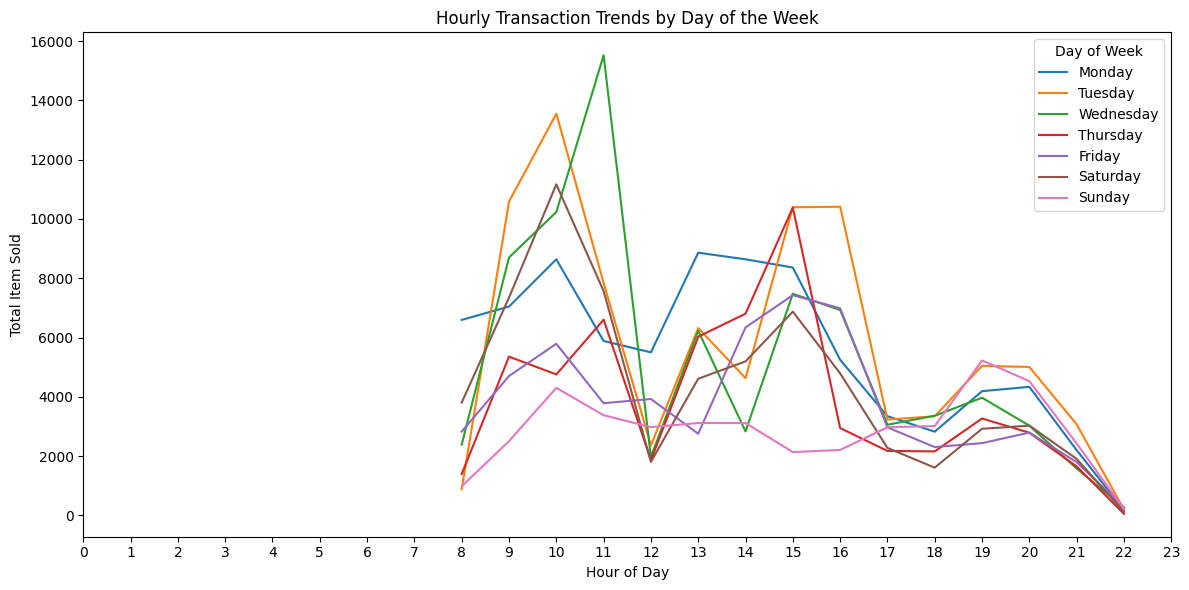

In [14]:
# Sales Analysis by Hours of Each Day
days_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_new['day_name'] = df_new['TANGGAL'].dt.day_name()
df_new['hour'] = pd.to_datetime(df_new['JAM'], format='%H:%M:%S', errors='coerce').dt.hour

hourly_transactions = df_new.groupby(['day_name', 'hour'])['QTY'].sum().reset_index()
hourly_transactions = hourly_transactions.pivot(index='hour', columns='day_name', values='QTY').fillna(0)

hourly_transactions = hourly_transactions[days_name]

hourly_transactions.plot(kind='line', figsize=(12, 6))
plt.title('Hourly Transaction Trends by Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Total Item Sold')
plt.xticks(range(24))
plt.legend(title='Day of Week')
plt.tight_layout()
plt.show()

# The graph shows that the transactions peak around 9 AM to 5 PM. At night, the transactions are not that much, unlike morning to evening. This shows that the supermarket open at 8 AM and close at 10 PM.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-b2edaba33d87>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  item_counts_by_period = df_new.groupby(['period_day', 'KEL']).size().reset_index(name='count')
<ipython-input-15-b2edaba33d87>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_

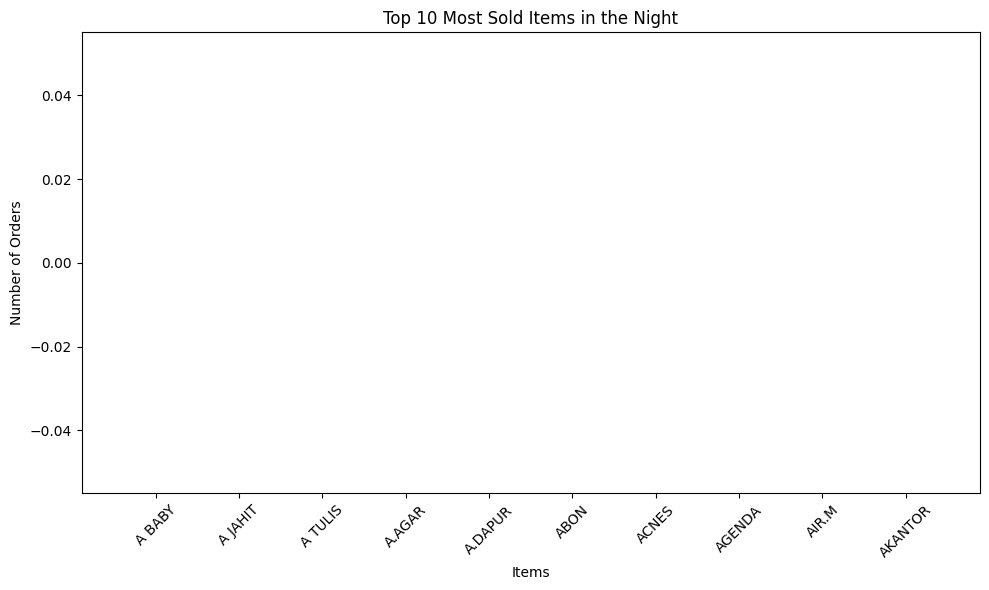

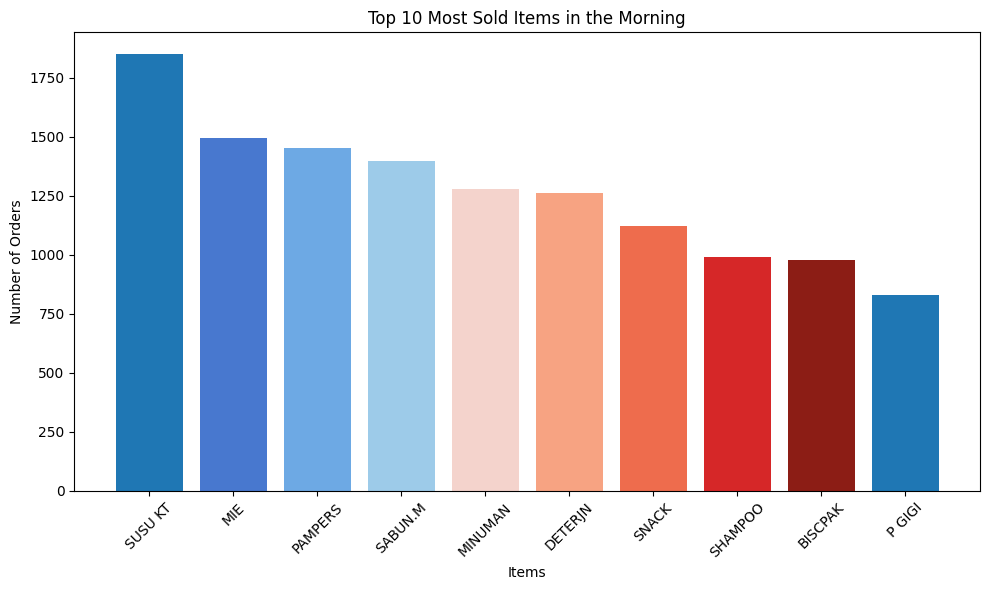

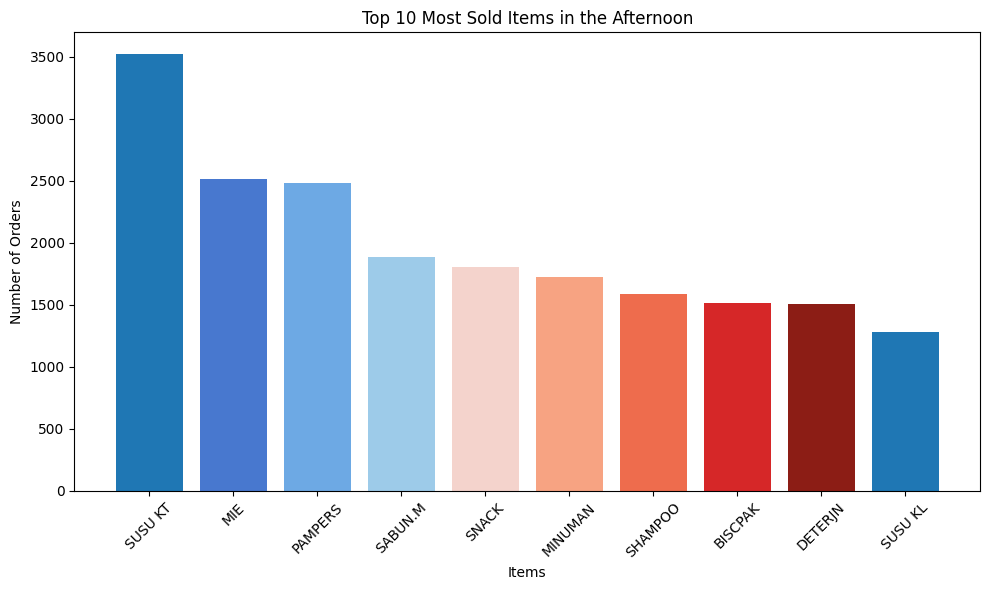

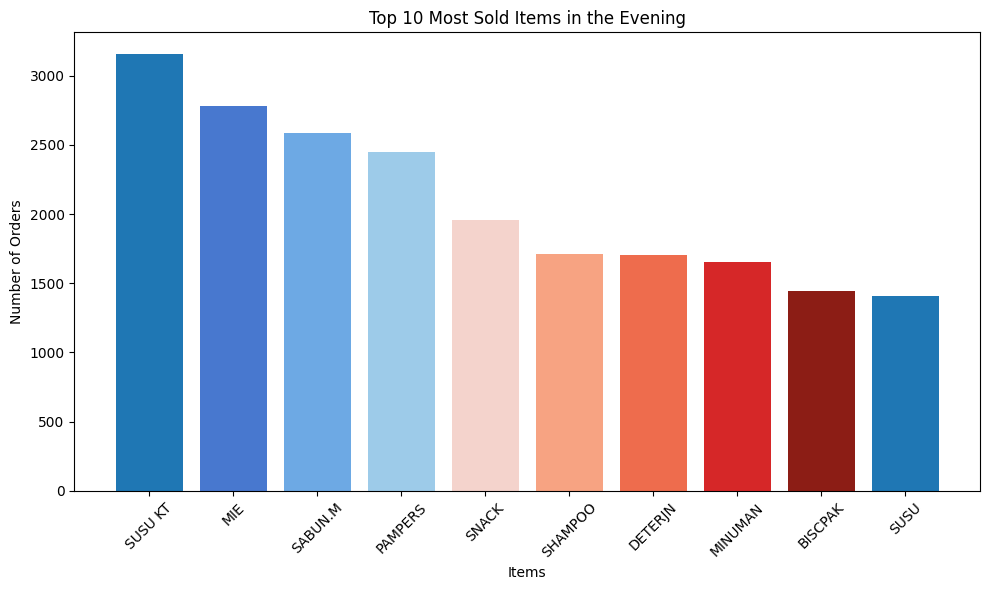

In [15]:
# Most Sold Items by Period
hours = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df_new['period_day'] = pd.cut(df_new['hour'], bins=hours, labels=labels, right=False)

colors = ['#1f77b4', '#4878cf', '#6da9e4', '#9dcbe9', '#f4d3cc', '#f7a382', '#ee6c4d', '#d62728', '#8c1d15']

item_counts_by_period = df_new.groupby(['period_day', 'KEL']).size().reset_index(name='count')
top_items_by_period = item_counts_by_period.groupby('period_day').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

periods = top_items_by_period['period_day'].unique()

for period in periods:
    data = top_items_by_period[top_items_by_period['period_day'] == period]

    colors = colors[:len(data)]

    plt.figure(figsize=(10, 6))
    plt.bar(data['KEL'], data['count'], color=colors)
    plt.title(f'Top 10 Most Sold Items in the {period.capitalize()}')
    plt.xlabel('Items')
    plt.ylabel('Number of Orders')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# It shows that the transactions peak in the afternoon and evening with SUSU KT as the most sold item. At night, there are no transaction due to the open hour of supermarket.

## Apriori Algorithm

In [18]:
apriori_data = pd.crosstab(df_new['NO_BKT'], df_new['KEL'])

apriori_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Convert quantities to 1 and 0
encoded_basket = apriori_data.applymap(lambda x: 1 if x > 0 else 0)

encoded_basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-19-d402931b01a7>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_basket = apriori_data.applymap(lambda x: 1 if x > 0 else 0)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
frequent_itemsets = apriori(encoded_basket, min_support=0.02, use_colnames=True)
frequent_itemsets_data = frequent_itemsets[['support', 'itemsets']]

frequent_itemsets_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.037991,(AIR.M)
1,0.032251,(ASESORS)
2,0.033590,(B DAPUR)
3,0.063600,(BISCPAK)
4,0.024106,(BTL/DOT)
5,0.032360,(COKLAT)
6,0.026593,(DDORANT)
7,0.083607,(DETERJN)
8,0.028507,(GULA)
9,0.021373,(HBL)


In [21]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BISCPAK),(SNACK),0.063600,0.068984,0.021974,0.345509,5.008515,0.017587,1.422504,0.854699
1,(SNACK),(BISCPAK),0.068984,0.063600,0.021974,0.318542,5.008515,0.017587,1.374112,0.859642
2,(DETERJN),(MIE),0.083607,0.078878,0.023259,0.278195,3.526894,0.016664,1.276137,0.781831
3,(MIE),(DETERJN),0.078878,0.083607,0.023259,0.294872,3.526894,0.016664,1.299612,0.777817
4,(DETERJN),(SOFTENR),0.083607,0.042883,0.027605,0.330173,7.699413,0.024019,1.428902,0.949505
5,(SOFTENR),(DETERJN),0.042883,0.083607,0.027605,0.643722,7.699413,0.024019,2.572131,0.909105
6,(DETERJN),(SUSU KT),0.083607,0.166530,0.023997,0.287022,1.723545,0.010074,1.168998,0.458101
7,(SUSU KT),(DETERJN),0.166530,0.083607,0.023997,0.144100,1.723545,0.010074,1.070678,0.503678
8,(P GIGI),(PAMPERS),0.076227,0.139718,0.020608,0.270348,1.934954,0.009958,1.179030,0.523064
9,(PAMPERS),(P GIGI),0.139718,0.076227,0.020608,0.147496,1.934954,0.009958,1.083600,0.561667


## Insights
- Toothpaste (P GIGI) and Body Soap (SABUN.M): High lift (5.563) and confidence (0.536) suggest these products are frequently purchased together.
- Detergent (DETERJN) and Fabric Softener (SOFTENER): High lift (7.699) and confidence (0.643) indicate a strong complementary relationship.
- Snacks (SNACK) and Biscuits (BISCPAK): Moderate lift (5.008) and confidence (0.345) suggest frequent pairing, ideal for impulse purchases.
- High interconnection between Personal Care Products (e.g., lift of 6.611 between Shampoo and Body Soap) suggests grouping them in one section for convenience.

## Layout Optimization Recommendation
**Create Themed Zones:**
- Personal Care Zone: Group Toothpaste, Shampoo, and Body Soap together. Place them in a visually appealing section with clear labels to attract attention and make shopping intuitive.
- Cleaning Supplies Zone: Combine Detergents and Fabric Softeners in one aisle. Add related products, such as stain removers or sponges, to encourage additional purchases.

**Impulse Buy Sections:**
- Position Snacks and Biscuits near checkout counters or in high-traffic areas. Pair them with Drinks to stimulate impulse purchases.

**Proximity Strategy:**
- Place complementary products close to each other (Detergents and Fabric Softeners in adjacent shelves, Shampoo next to Body Soap and Toothpaste). Use signage to highlight these pairings, like "Buy Together and Save!"

**Cross-Selling Promotions:**
- Offer discounts on paired products identified by association rules. Example: "Buy Shampoo and Get Body Soap at 10% Off".

**Pathway Optimization:**
- Arrange aisles to guide customers through complementary sections naturally. For example: Start with personal care, transition to cleaning supplies, and end with snacks and beverages.